# Libraries

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [95]:
import warnings
warnings.filterwarnings('ignore')
# Undesired warning messages was blocked for output to be more readable

# Understanding Data

In [96]:
df = pd.read_csv('heart_disease_dataset.csv')

In [97]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [99]:
df.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


# Data Visulation

Before model selection and machine learning part, I wanna sketch some graphs

In [100]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

- Age

<Axes: xlabel='Age', ylabel='Density'>

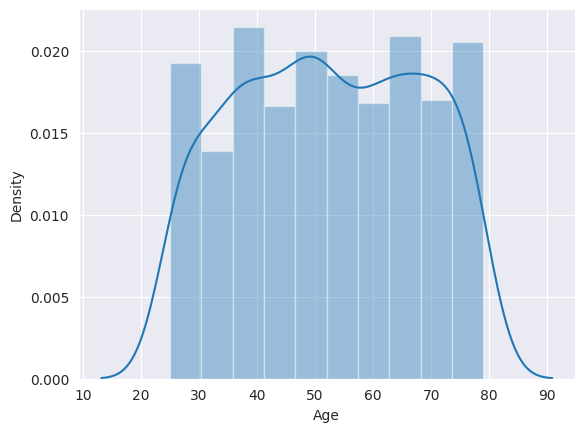

In [101]:
sns.distplot(df['Age'])

- Gender

In [102]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

([<matplotlib.patches.Wedge at 0x7d793e82a560>,
 [Text(-0.010367174777798825, 1.0999511451365132, 'Female'),
  Text(0.010367277762657235, -1.0999511441658636, 'Male')],
 [Text(-0.005654822606072086, 0.5999733518926434, '50.30%'),
  Text(0.005654878779631219, -0.5999733513631982, '49.70%')])

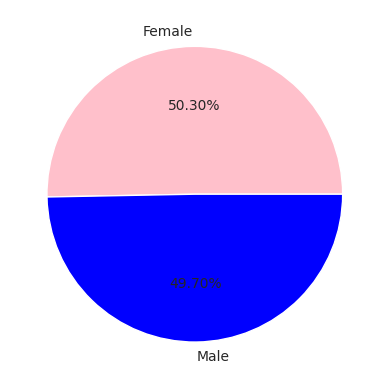

In [103]:
female = df['Gender'].value_counts()['Female']
male = df['Gender'].value_counts()['Male']

labels = ['Female', 'Male']
colors = ['pink', 'blue']

values = [female, male]

plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

This research was executed on genders almost equally as seen on the graph

- Cholesterol & Blood Pressure

<Axes: xlabel='Blood Pressure', ylabel='Cholesterol'>

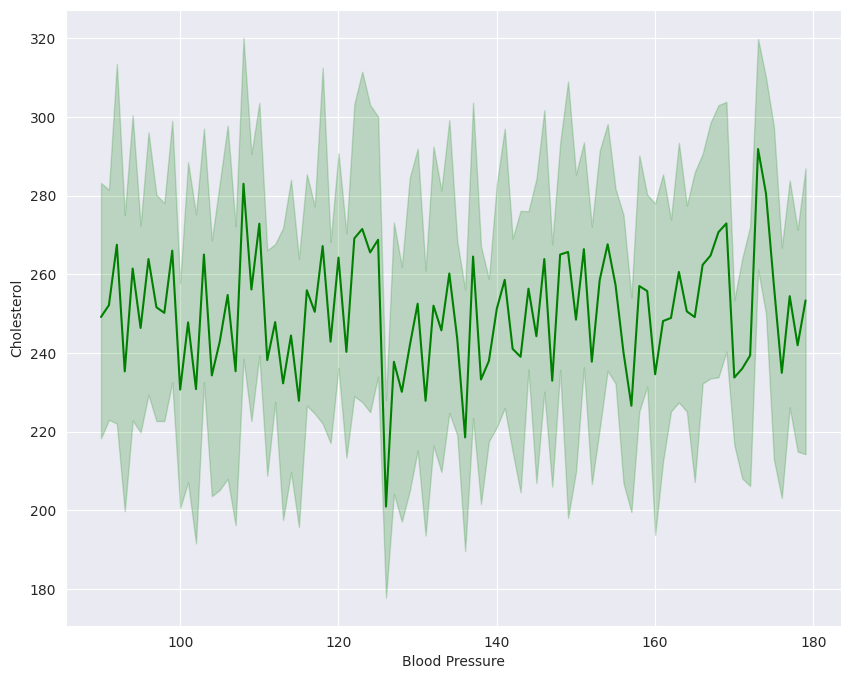

In [104]:
plt.figure(figsize = (10, 8))
sns.lineplot(data = df, y = 'Cholesterol', x = 'Blood Pressure', color = 'green')

- Blood Pressure & Smoking

<Axes: xlabel='Smoking', ylabel='Blood Pressure'>

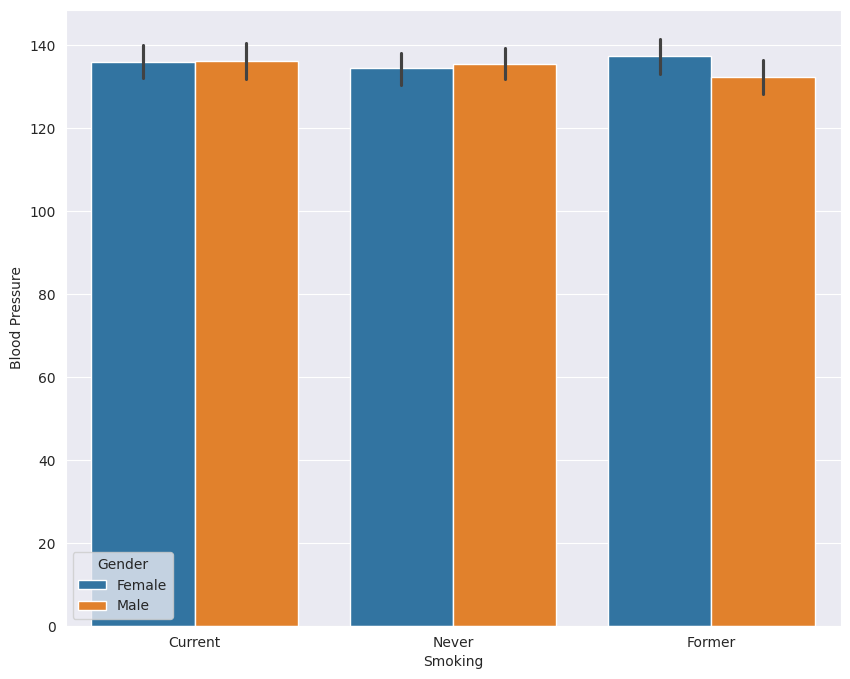

In [105]:
plt.figure(figsize = (10, 8))
sns.barplot(data = df, x = 'Smoking', y = 'Blood Pressure', hue = 'Gender')

Values are almost same. However as expected, blood pressure is the higher than others for men who has smoked before. For women, it is higher for women who is smoking currently.

- Exercise Hours & Blood Sugar

<Axes: xlabel='Exercise Hours', ylabel='Blood Sugar'>

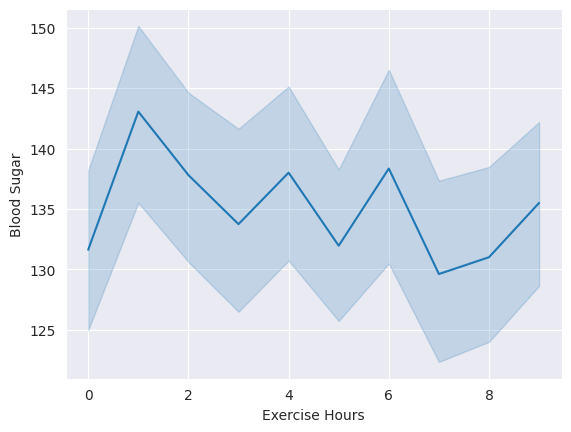

In [106]:
sns.lineplot(data = df, x = 'Exercise Hours', y = 'Blood Sugar')

As expected, there is an inverse linear ratio between exercise hours and blood sugar

- Stress Level & Blood Pressure

In [107]:
df['Stress Level'].unique()

array([ 8,  9,  5,  7,  2,  4,  3, 10,  1,  6])

<Figure size 1000x600 with 0 Axes>

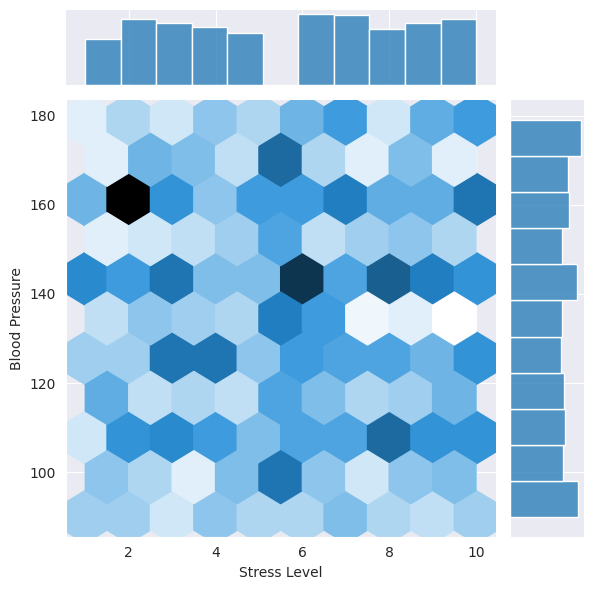

In [108]:
plt.figure(figsize = (10, 6))
sns.jointplot(data = df, x = 'Stress Level', y = 'Blood Pressure', kind = 'hex')

In [109]:
df.head(3)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1


# Model Selection

We are predicting if that person has a heart disease risk or not. Consequently, it is a classification problem.

In machine learning models, numerical data types instead of categorical data is required. We need categorical data to convert to numerical type.

In [110]:
df['Alcohol Intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

In [111]:
df = pd.get_dummies(df, columns = ['Gender', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina'], drop_first = True)

In [112]:
df.head(3)

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Stress Level,Blood Sugar,Chest Pain Type,Heart Disease,Gender_Male,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes
0,75,228,119,66,Current,Heavy,1,8,119,Atypical Angina,1,False,False,False,True,True
1,48,204,165,62,Current,NaN,5,9,70,Typical Angina,0,True,False,False,False,True
2,53,234,91,67,Never,Heavy,3,5,196,Atypical Angina,1,True,True,False,True,True


In [113]:
le = LabelEncoder()
df['Smoking'] = le.fit_transform(df['Smoking'])
df['Alcohol Intake'] = le.fit_transform(df['Alcohol Intake'])
df['Chest Pain Type'] = le.fit_transform(df['Chest Pain Type'])

In [114]:
df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Stress Level,Blood Sugar,Chest Pain Type,Heart Disease,Gender_Male,Family History_Yes,Diabetes_Yes,Obesity_Yes,Exercise Induced Angina_Yes
0,75,228,119,66,0,0,1,8,119,1,1,False,False,False,True,True
1,48,204,165,62,0,2,5,9,70,3,0,True,False,False,False,True
2,53,234,91,67,2,0,3,5,196,1,1,True,True,False,True,True
3,69,192,90,72,0,2,4,7,107,2,0,False,False,True,False,True
4,62,172,163,93,2,2,6,2,183,0,0,False,False,True,False,True


Now, we have a full numerical data set. We can discuss about models

In [115]:
y = df['Heart Disease']
x = df.drop('Heart Disease', axis = 1)

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)

In [124]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

pred_rf = rf.predict(x_test)
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       171
           1       1.00      1.00      1.00       129

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In Random Forest Classifier model, we have 100% score. It can be a perfect dataset and model or overfitting. Let's check other models too.

In [128]:
xg_model = xgb.XGBRegressor(n_estimators = 250, max_depth = 6, subsample = 0.75, learning_rate = 0.05)
xg_model.fit(x_train, y_train)

score_xg = xg_model.score(x_test, y_test)
print(f'XGB Regressor Score: {score_xg}')

XGB Regressor Score: 0.99999976500592


Still we have an almost 100% score...

In [130]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
pred_lr = lr_model.predict(x_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       171
           1       0.78      0.72      0.75       129

    accuracy                           0.79       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.79      0.79       300



It seems logistic regression model is more healthy than others. Because there is an overfitting doubt on XGB Regressor and Random Forest Classifier.